In [ ]:
!pip install scikit-image matplotlib numpy gdown

In [ ]:
import gdown

# Descargar la imagen
image_url = 'https://drive.google.com/uc?id=19fhcTeMIACnUiukaqsBapSwFeiidG57J'
image_path = 'image.jpg'
gdown.download(image_url, image_path, quiet=False)

# Descargar la mascara
mask_url = 'https://drive.google.com/uc?id=1C3XJ8ThxUL4HDPOM3VViFirjNRk8HmuY'
mask_path = 'mask.jpg'
gdown.download(mask_url, mask_path, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=19fhcTeMIACnUiukaqsBapSwFeiidG57J
To: /content/image.jpg
100%|██████████| 19.7k/19.7k [00:00<00:00, 41.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1C3XJ8ThxUL4HDPOM3VViFirjNRk8HmuY
To: /content/mask.jpg
100%|██████████| 10.7k/10.7k [00:00<00:00, 33.7MB/s]


'mask.jpg'

# **Recorte**



Downloading...
From: https://drive.google.com/uc?id=19fhcTeMIACnUiukaqsBapSwFeiidG57J
To: /content/image.jpg
100%|██████████| 19.7k/19.7k [00:00<00:00, 36.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1C3XJ8ThxUL4HDPOM3VViFirjNRk8HmuY
To: /content/mask.jpg
100%|██████████| 10.7k/10.7k [00:00<00:00, 9.43MB/s]


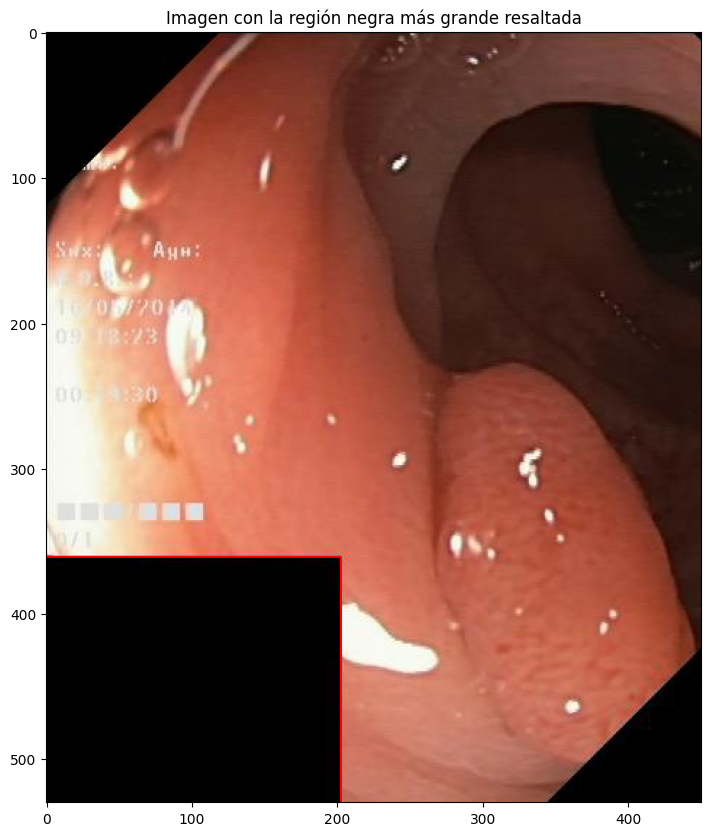

El área de la región negra más grande es 34307 píxeles.


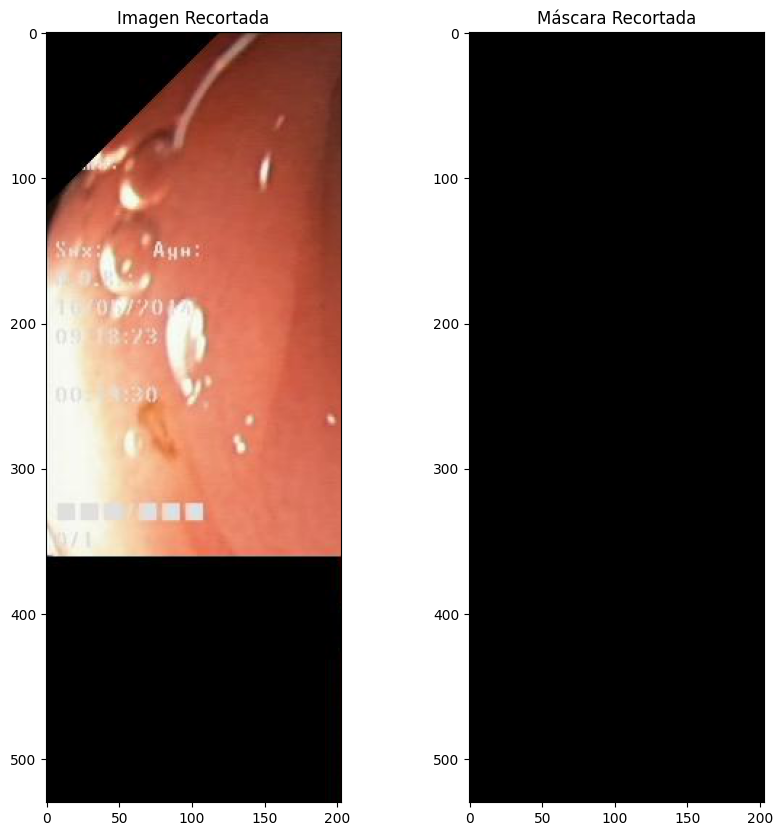

<ipython-input-3-ea17c912a3d4>:68: UserWarning: mask_cropped.jpg is a low contrast image
  skimage.io.imsave('mask_cropped.jpg', mask_cropped)


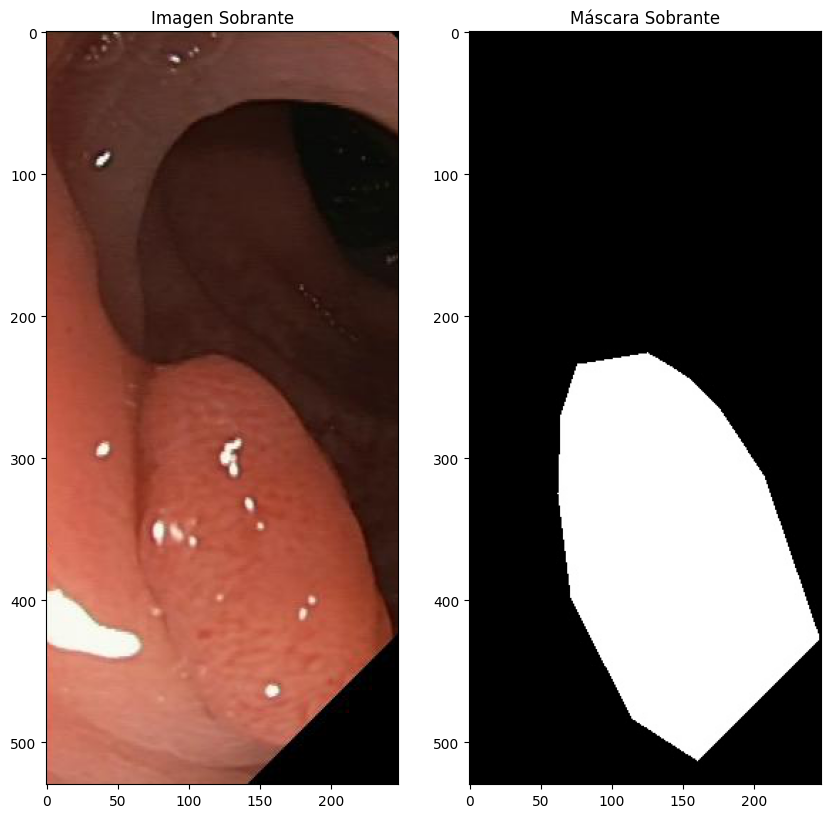

In [ ]:
import skimage
from skimage import io
from skimage.measure import label, regionprops
import numpy as np
import matplotlib.pyplot as plt
import gdown

# Descarga la imagen
image_url = 'https://drive.google.com/uc?id=19fhcTeMIACnUiukaqsBapSwFeiidG57J'
image_path = 'image.jpg'
gdown.download(image_url, image_path, quiet=False)

# Descarga la máscara
mask_url = 'https://drive.google.com/uc?id=1C3XJ8ThxUL4HDPOM3VViFirjNRk8HmuY'
mask_path = 'mask.jpg'
gdown.download(mask_url, mask_path, quiet=False)

# Lee la imagen y la máscara
img = skimage.io.imread(image_path)
mask = skimage.io.imread(mask_path)

# Convierte la imagen a escala de grises
gray = skimage.color.rgb2gray(img)

# Identifica los pixeles negros en la imagen
binary = gray < 0.1  # Ajusta este valor según sea necesario para identificar el color negro

# Etiqueta las regiones de la imagen
labels = label(binary)

# Encuentra la región negra más grande
regions = regionprops(labels)
largest_region = max(regions, key=lambda region: region.area)

# Muestra la imagen original con la región negra más grande resaltada
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.contour(labels == largest_region.label, colors='red')
plt.title('Imagen con la región negra más grande resaltada')
plt.show()

print(f"El área de la región negra más grande es {largest_region.area} píxeles.")

# Define si el recorte será vertical u horizontal
cut = "horizontal"  # Cambia a "horizontal" para un corte horizontal

# Recorta la imagen y la máscara alrededor de la región negra más grande
minr, minc, maxr, maxc = largest_region.bbox
if cut == "vertical":
    img_cropped = img[minr:maxr, :]
    mask_cropped = mask[minr:maxr, :]
else:  # cut == "horizontal"
    img_cropped = img[:, minc:maxc]
    mask_cropped = mask[:, minc:maxc]

# Muestra la imagen y la máscara recortadas
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(img_cropped)
plt.title('Imagen Recortada')
plt.subplot(1, 2, 2)
plt.imshow(mask_cropped)
plt.title('Máscara Recortada')
plt.show()

# Guarda la imagen y la máscara recortadas
skimage.io.imsave('img_cropped.jpg', img_cropped)
skimage.io.imsave('mask_cropped.jpg', mask_cropped)

# Define las regiones sobrantes de la imagen y la máscara
if cut == "vertical":
    if minr > 0:
        img_remaining = img[:minr, :]
        mask_remaining = mask[:minr, :]
    else:
        img_remaining = img[maxr:, :]
        mask_remaining = mask[maxr:, :]
else:  # cut == "horizontal"
    if minc > 0:
        img_remaining = img[:, :minc]
        mask_remaining = mask[:, :minc]
    else:
        img_remaining = img[:, maxc:]
        mask_remaining = mask[:, maxc:]

# Verificar si las regiones sobrantes son no vacías antes de mostrar y guardar
if img_remaining.size > 0 and mask_remaining.size > 0:
    # Muestra la imagen y la máscara sobrantes
    plt.figure(figsize=(10, 10))
    plt.subplot(1, 2, 1)
    plt.imshow(img_remaining)
    plt.title('Imagen Sobrante')
    plt.subplot(1, 2, 2)
    plt.imshow(mask_remaining)
    plt.title('Máscara Sobrante')
    plt.show()

    # Guarda la imagen y la máscara sobrantes
    skimage.io.imsave('img_remaining.jpg', img_remaining)
    skimage.io.imsave('mask_remaining.jpg', mask_remaining)
else:
    print("No hay imagen/máscara sobrante después del recorte.")


# **Recorte para las mil imagenes**

In [ ]:
import os
import zipfile
import skimage
from skimage import io
from skimage.measure import label, regionprops
import numpy as np
import matplotlib.pyplot as plt

# Descomprime el archivo zip
with zipfile.ZipFile('/content/segmented_images.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

# Obtiene las rutas a todas las imágenes y las máscaras
img_paths = sorted(os.listdir('/content/segmented-images/images'))
mask_paths = sorted(os.listdir('/content/segmented-images/masks'))

# Procesa cada imagen y máscara
for img_path, mask_path in zip(img_paths, mask_paths):
    # Lee la imagen y la máscara
    img = skimage.io.imread('/content/segmented-images/images/' + img_path)
    mask = skimage.io.imread('/content/segmented-images/masks/' + mask_path)

    # Convierte la imagen a escala de grises
    gray = skimage.color.rgb2gray(img)

    # Identifica los pixeles negros en la imagen
    binary = gray < 0.1  # Ajusta este valor según sea necesario para identificar el color negro

    # Etiqueta las regiones de la imagen
    labels = label(binary)

    # Encuentra la región negra más grande
    regions = regionprops(labels)
    largest_region = max(regions, key=lambda region: region.area)

    # Define si el recorte será vertical u horizontal
    cut = "horizontal"  # Cambia a "horizontal" para un corte horizontal

    # Recorta la imagen y la máscara alrededor de la región negra más grande
    minr, minc, maxr, maxc = largest_region.bbox
    if cut == "vertical":
        img_cropped = img[minr:maxr, :]
        mask_cropped = mask[minr:maxr, :]
    else:  # cut == "horizontal"
        img_cropped = img[:, minc:maxc]
        mask_cropped = mask[:, minc:maxc]

    # Guarda la imagen y la máscara recortadas
    skimage.io.imsave('img_cropped.jpg', img_cropped)
    skimage.io.imsave('mask_cropped.jpg', mask_cropped)

    # Define las regiones sobrantes de la imagen y la máscara
    if cut == "vertical":
        if minr > 0:
            img_remaining = img[:minr, :]
            mask_remaining = mask[:minr, :]
        else:
            img_remaining = img[maxr:, :]
            mask_remaining = mask[maxr:, :]
    else:  # cut == "horizontal"
        if minc > 0:
            img_remaining = img[:, :minc]
            mask_remaining = mask[:, :minc]
        else:
            img_remaining = img[:, maxc:]
            mask_remaining = mask[:, maxc:]

    # Verifica si las regiones sobrantes están vacías
    if img_remaining.size != 0 and mask_remaining.size != 0:
        # Crea los directorios si no existen
        if not os.path.exists('/content/sample_data/imagen'):
            os.makedirs('/content/sample_data/imagen')
        if not os.path.exists('/content/sample_data/mascaras'):
            os.makedirs('/content/sample_data/mascaras')

        # Guarda las imágenes y las máscaras sobMis disculpas por el corte abrupto.


        # Guarda las imágenes y las máscaras sobrantes
        skimage.io.imsave('/content/sample_data/imagen/' + img_path, img_remaining)
        skimage.io.imsave('/content/sample_data/mascaras/' + mask_path, mask_remaining)
'''
import shutil

# Crea una carpeta temporal para almacenar los archivos que se van a comprimir
os.makedirs('/content/sample_data/temp', exist_ok=True)

# Mueve los archivos de imagen y máscara a la carpeta temporal
shutil.move('/content/sample_data/imagen', '/content/sample_data/temp')
shutil.move('/content/sample_data/mascaras', '/content/sample_data/temp')

# Crea un nuevo archivo ZIP
with zipfile.ZipFile('/content/sample_data/remaining_files.zip', 'w') as zipf:
    # Recorre todos los archivos en la carpeta temporal
    for foldername, subfolders, filenames in os.walk('/content/sample_data/temp'):
        for filename in filenames:
            # Crea la ruta completa del archivo
            file_path = os.path.join(foldername, filename)
            # Agrega el archivo al archivo ZIP
            zipf.write(file_path, arcname=os.path.relpath(file_path, '/content/sample_data/temp'))

# Elimina la carpeta temporal y su contenido
shutil.rmtree('/content/sample_data/temp')
'''

In [ ]:
if os.path.exists('/content/segmented-images/images'):
    print("El directorio existe.")
else:
    print("El directorio no existe.")


# **Escalado de imagenes**

In [ ]:
from skimage.transform import resize

# Define una función para escalar imágenes
def scale_image(image, new_shape):
    return resize(image, new_shape)

# Define el nuevo tamaño al que quieres escalar las imágenes
new_shape = (256, 256)

# Define los directorios de entrada y salida
input_image_dir = '/content/sample_data/imagen/'
input_mask_dir = '/content/sample_data/mascaras/'
output_image_dir = '/content/sample_data/scaled_imagen/'
output_mask_dir = '/content/sample_data/scaled_mascaras/'

# Crea los directorios de salida si no existen
os.makedirs(output_image_dir, exist_ok=True)
os.makedirs(output_mask_dir, exist_ok=True)

# Obtiene las rutas a todas las imágenes y máscaras
img_paths = sorted(os.listdir(input_image_dir))
mask_paths = sorted(os.listdir(input_mask_dir))

# Procesa cada imagen y máscara
for img_path, mask_path in zip(img_paths, mask_paths):
    # Lee la imagen y la máscara
    img = skimage.io.imread(input_image_dir + img_path)
    mask = skimage.io.imread(input_mask_dir + mask_path)

    # Escala la imagen y la máscara al nuevo tamaño
    img_scaled = scale_image(img, new_shape)
    mask_scaled = scale_image(mask, new_shape)

    # Guarda la imagen y la máscara escaladas
    skimage.io.imsave(output_image_dir + img_path, img_scaled)
    skimage.io.imsave(output_mask_dir + mask_path, mask_scaled)
'''
import shutil
# Crea una carpeta temporal para almacenar los archivos que se van a comprimir
os.makedirs('/content/sample_data/temp_scaled', exist_ok=True)

# Mueve los archivos de imagen y máscara escalados a la carpeta temporal
shutil.move(output_image_dir, '/content/sample_data/temp_scaled')
shutil.move(output_mask_dir, '/content/sample_data/temp_scaled')

# Crea un nuevo archivo ZIP
with zipfile.ZipFile('/content/sample_data/scaled_files.zip', 'w') as zipf:
    # Recorre todos los archivos en la carpeta temporal
    for foldername, subfolders, filenames in os.walk('/content/sample_data/temp_scaled'):
        for filename in filenames:
            # Crea la ruta completa del archivo
            file_path = os.path.join(foldername, filename)
            # Agrega el archivo al archivo ZIP
            zipf.write(file_path, arcname=os.path.relpath(file_path, '/content/sample_data/temp_scaled'))

# Elimina la carpeta temporal y su contenido
shutil.rmtree('/content/sample_data/temp_scaled')
'''

In [ ]:
#@title Helper

def mostrar(folder, figsize=(15, 9), grid = (4,4)):
  #https://stackoverflow.com/questions/60443761/displaying-random-images-from-multiple-folders-using-python
  images = []
  for image in os.listdir(folder):
    images.append(os.path.join(folder, image))

  plt.figure(1, figsize=figsize)
  plt.axis('off')
  n = 0
  for i in range(grid[0]*grid[1]):
    n += 1
    random_img = random.choice(images)
    imgs = imread(random_img)
    plt.subplot(*grid, n)
    plt.axis('off')
    plt.imshow(imgs)

  plt.show()

In [ ]:
!wget  /content/scaled_imagen.zip

In [ ]:
!wget  /content/scaled_imagen.zip.zip

#COMPRIMIDO

In [ ]:
!unzip -qq "scaled_imagen.zip"

In [ ]:
print('scaled_imagen')

scaled_imagen


Descomprimir: Máscaras

In [ ]:
!unzip -qq "scaled_mascaras.zip"

In [ ]:
print('scaled_mascaras.zip')

scaled_mascaras.zip


In [ ]:
!cd scaled_mascaras; for file in *.jpg; do mv "$file" "${file%.jpg}_mask.jpg"; done

#U-Net


In [ ]:
import matplotlib.pyplot as plt
import random
import os
from skimage.io import imread
from torch.utils.data import DataLoader, random_split
from torch import optim
from os.path import splitext
from os import listdir
import numpy as np
from glob import glob
import torch
from torch.utils.data import Dataset
from PIL import Image
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Function

In [ ]:
#@title U-net

class DoubleConv(nn.Module):
    """(convolution => [BN] => ReLU) * 2"""

    def __init__(self, in_channels, out_channels, mid_channels=None):
        super().__init__()
        if not mid_channels:
            mid_channels = out_channels
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, mid_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(mid_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(mid_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.double_conv(x)


class Down(nn.Module):
    """Downscaling with maxpool then double conv"""

    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.maxpool_conv = nn.Sequential(
            nn.MaxPool2d(2),
            DoubleConv(in_channels, out_channels)
        )

    def forward(self, x):
        return self.maxpool_conv(x)


class Up(nn.Module):
    """Upscaling then double conv"""

    def __init__(self, in_channels, out_channels, bilinear=True):
        super().__init__()

        # if bilinear, use the normal convolutions to reduce the number of channels
        if bilinear:
            self.up = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
            self.conv = DoubleConv(in_channels, out_channels, in_channels // 2)
        else:
            self.up = nn.ConvTranspose2d(in_channels , in_channels // 2, kernel_size=2, stride=2)
            self.conv = DoubleConv(in_channels, out_channels)


    def forward(self, x1, x2):
        x1 = self.up(x1)
        # input is CHW
        diffY = x2.size()[2] - x1.size()[2]
        diffX = x2.size()[3] - x1.size()[3]

        x1 = F.pad(x1, [diffX // 2, diffX - diffX // 2,
                        diffY // 2, diffY - diffY // 2])
        # if you have padding issues, see
        # https://github.com/HaiyongJiang/U-Net-Pytorch-Unstructured-Buggy/commit/0e854509c2cea854e247a9c615f175f76fbb2e3a
        # https://github.com/xiaopeng-liao/Pytorch-UNet/commit/8ebac70e633bac59fc22bb5195e513d5832fb3bd
        x = torch.cat([x2, x1], dim=1)
        return self.conv(x)


class OutConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(OutConv, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=1)

    def forward(self, x):
        return self.conv(x)

class UNet(nn.Module):
    def __init__(self, n_channels, n_classes, bilinear=True):
        super(UNet, self).__init__()
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.bilinear = bilinear

        self.inc = DoubleConv(n_channels, 32)
        self.down1 = Down(32, 64)
        self.down2 = Down(64, 128)
        self.down3 = Down(128, 256)
        factor = 2 if bilinear else 1
        self.down4 = Down(256, 512 // factor)
        self.up1 = Up(512, 256 // factor, bilinear)
        self.up2 = Up(256, 128 // factor, bilinear)
        self.up3 = Up(128, 64 // factor, bilinear)
        self.up4 = Up(64, 32, bilinear)
        self.outc = OutConv(32, n_classes)

    def forward(self, x):
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5 = self.down4(x4)
        x = self.up1(x5, x4)
        x = self.up2(x, x3)
        x = self.up3(x, x2)
        x = self.up4(x, x1)
        logits = self.outc(x)
        return logits

In [ ]:
#@title Dataset

class BasicDataset(Dataset):
    def __init__(self, imgs_dir, masks_dir, scale=1, mask_suffix=''):
        self.imgs_dir = imgs_dir
        self.masks_dir = masks_dir
        self.scale = scale
        self.mask_suffix = mask_suffix
        assert 0 < scale <= 1, 'Scale must be between 0 and 1'

        self.ids = [splitext(file)[0] for file in listdir(imgs_dir)
                    if not file.startswith('.')]


    def __len__(self):
        return len(self.ids)

    @classmethod
    def preprocess(cls, pil_img, scale):
        w, h = pil_img.size
        newW, newH = int(scale * w), int(scale * h)
        assert newW > 0 and newH > 0, 'Scale is too small'
        pil_img = pil_img.resize((newW, newH))

        img_nd = np.array(pil_img)

        if len(img_nd.shape) == 2:
            img_nd = np.expand_dims(img_nd, axis=2)

        # HWC to CHW
        img_trans = img_nd.transpose((2, 0, 1))
        if img_trans.max() > 1:
            img_trans = img_trans / 255

        return img_trans

    def __getitem__(self, i):
        idx = self.ids[i]
        mask_file = glob(self.masks_dir + idx + self.mask_suffix + '.*')
        img_file = glob(self.imgs_dir + idx + '.*')

        assert len(mask_file) == 1, \
            f'Either no mask or multiple masks found for the ID {idx}: {mask_file}'
        assert len(img_file) == 1, \
            f'Either no image or multiple images found for the ID {idx}: {img_file}'
        mask = Image.open(mask_file[0])
        img = Image.open(img_file[0])

        assert img.size == mask.size, \
            f'Image and mask {idx} should be the same size, but are {img.size} and {mask.size}'

        img = self.preprocess(img, self.scale)
        mask = self.preprocess(mask, self.scale)

        return {
            'image': torch.from_numpy(img).type(torch.FloatTensor),
            'mask': torch.from_numpy(mask).type(torch.FloatTensor)
        }


In [ ]:
#@title Evaluación
def eval_net(net, loader, device):
    """Evaluation without the densecrf with the dice coefficient"""
    net.eval()
    mask_type = torch.float32 if net.n_classes == 1 else torch.long
    n_val = len(loader)  # the number of batch
    tot = 0


    for batch in loader:
      imgs, true_masks = batch['image'], batch['mask']
      imgs = imgs.to(device=device, dtype=torch.float32)
      true_masks = true_masks.to(device=device, dtype=mask_type)

      with torch.no_grad():
        mask_pred = net(imgs)

      if net.n_classes > 1:
        tot += F.cross_entropy(mask_pred, true_masks).item()
      else:
        pred = torch.sigmoid(mask_pred)
        pred = (pred > 0.5).float()
        #cambios
        tot += dice_coeff(pred, true_masks).mean().item()

    net.train()
    return tot / n_val


class DiceCoeff(Function):
    """Dice coeff for individual examples"""

    def forward(self, input, target):
        self.save_for_backward(input, target)
        eps = 0.0001
        #self.inter = torch.dot(input.view(-1), target.view(-1))
        #cambios
        self.inter = torch.matmul(input.flatten(-1), target.flatten(-1))
        self.union = torch.sum(input) + torch.sum(target) + eps

        t = (2 * self.inter.float() + eps) / self.union.float()
        return t

    # This function has only a single output, so it gets only one gradient
    def backward(self, grad_output):

        input, target = self.saved_variables
        grad_input = grad_target = None

        if self.needs_input_grad[0]:
            grad_input = grad_output * 2 * (target * self.union - self.inter) \
                         / (self.union * self.union)
        if self.needs_input_grad[1]:
            grad_target = None

        return grad_input, grad_target


def dice_coeff(input, target):
    """Dice coeff for batches"""
    if input.is_cuda:
        s = torch.FloatTensor(1).cuda().zero_()
    else:
        s = torch.FloatTensor(1).zero_()

    for i, c in enumerate(zip(input, target)):
        s = s + DiceCoeff().forward(c[0], c[1])

    return s / (i + 1)

### **Entrenamiento**

In [ ]:
#@title Parámetros
img_scale = 1.0
val_percent = 0.3
batch_size = 40
num_workers = 2
lr = 0.001
epochs = 96
dir_img = 'scaled_imagen/'
dir_mask = 'scaled_mascaras/'
device = torch.device('cuda')
criterion = nn.BCEWithLogitsLoss() #si es multiclase, usar nn.CrossEntropyLoss()

In [ ]:
dataset = BasicDataset(dir_img, dir_mask, img_scale, mask_suffix='_mask')
n_val = int(len(dataset) * val_percent)
n_train = len(dataset) - n_val
train, val = random_split(dataset, [n_train, n_val])
train_loade = DataLoader(train, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=True)
val_loader = DataLoader(val, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=True, drop_last=True)
net = UNet(n_channels=3, n_classes=1, bilinear=True)
net.to(device=device)
optimizer = optim.RMSprop(net.parameters(), lr=lr, weight_decay=1e-8, momentum=0.9)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min' if net.n_classes > 1 else 'max', patience=2)
global_step = 0

In [ ]:
lista_train=[]
lista_val=[]

In [ ]:
for epoch in range(epochs):
  net.train()
  epoch_loss = 0
  for batch in train_loade:
    imgs = batch['image']
    imgs = imgs.to(device=device, dtype=torch.float32)
    mask_type = torch.float32 if net.n_classes == 1 else torch.long
    true_masks = batch['mask'][:,0:1]
    true_masks = true_masks.to(device=device, dtype=mask_type)
    masks_pred = net(imgs)
    loss = criterion(masks_pred, true_masks)
    epoch_loss += loss.item()
    optimizer.zero_grad()
    loss.backward()
    nn.utils.clip_grad_value_(net.parameters(), 0.1)
    optimizer.step()
    global_step += 1
    if global_step % 10 == 0:
      print("Iter {}".format(global_step))
  val_score = eval_net(net, val_loader, device)
  scheduler.step(val_score)
  print("Train Loss {}".format(epoch_loss))
  lista_train.append(np.mean(epoch_loss))
  print("Val Score {}".format(val_score))
  lista_val.append(np.mean(val_score))

Iter 10
Train Loss 8.441945374011993
Val Score 0.021428648128885834
Iter 20
Iter 30
Train Loss 7.5495027005672455
Val Score 0.021428648128885834
Iter 40
Iter 50
Train Loss 7.490422934293747
Val Score 0.021428648128885834
Iter 60
Iter 70
Train Loss 7.278333395719528
Val Score 0.021428648128885834
Iter 80
Iter 90
Train Loss 6.964129954576492
Val Score 0.021428648128885834
Iter 100
Train Loss 6.830989450216293
Val Score 0.021428648128885834
Iter 110
Iter 120
Train Loss 6.841907024383545
Val Score 0.021428648128885834
Iter 130
Iter 140
Train Loss 6.745359182357788
Val Score 0.021428648128885834
Iter 150
Iter 160
Train Loss 6.714567989110947
Val Score 0.021428648128885834
Iter 170
Iter 180
Train Loss 6.768639534711838
Val Score 0.021428648128885834
Iter 190
Train Loss 6.7909912168979645
Val Score 0.021428648128885834
Iter 200
Iter 210
Train Loss 6.897626221179962
Val Score 0.021428648128885834
Iter 220
Iter 230
Train Loss 6.727397054433823
Val Score 0.021428648128885834
Iter 240
Iter 250
Tr

**Graficas**

**Curva de entrenamineto**

In [ ]:
import pandas as pd


<Axes: >

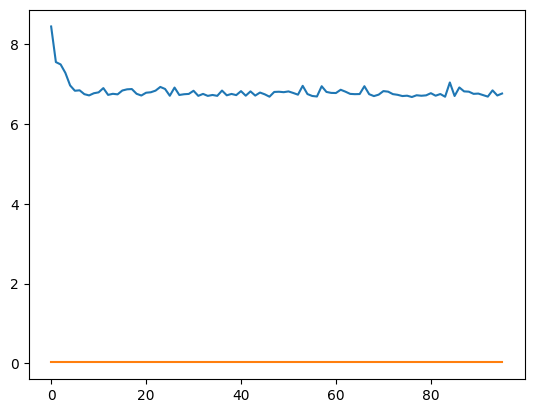

In [ ]:
pd.Series(lista_train).plot()
pd.Series(lista_val).plot()

In [ ]:
print(n_val, "ejemplos de validación")

294 ejemplos de validación


In [ ]:
import pandas as pd


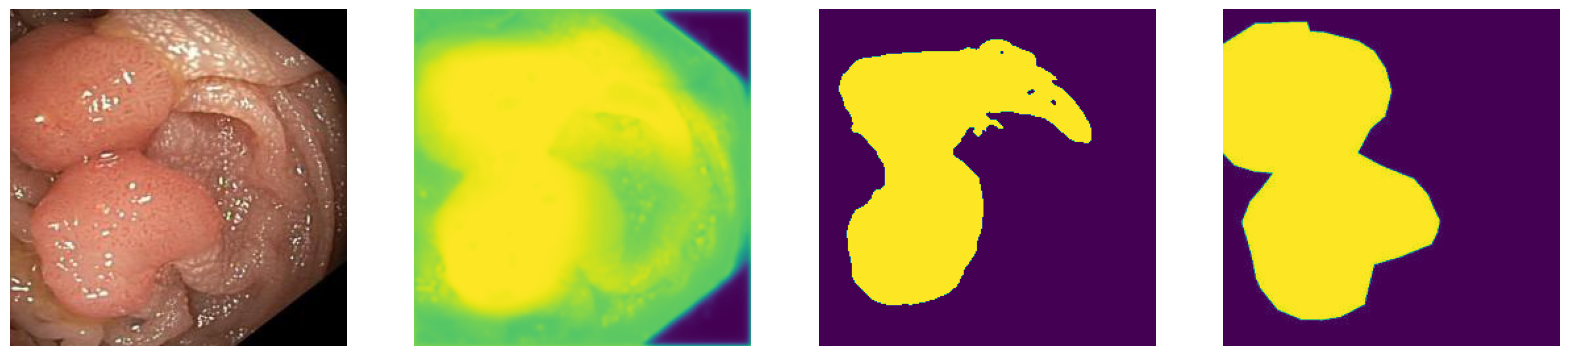

In [ ]:
#@title Evaluación { run: "auto" }
i = 35 #@param {type:"slider", min:0, max:254, step:1}
th = -0.5 #@param {type:"slider", min:-15, max:15, step:0.5}
im = val[i]['image']
im_to_show = im.numpy().transpose((1,2,0))
mask_to_show = val[i]['mask'][0]
plt.figure(figsize=(20,8))
plt.subplot(1,4,  1)
plt.axis('off')
plt.imshow(im_to_show)
plt.subplot(1,4,  2)
net.eval()
with torch.no_grad():
  predicted_mask = net(im.unsqueeze(0).to(device)).cpu().numpy()[0, 0]
plt.imshow(predicted_mask)
plt.axis('off')
plt.subplot(1,4,  3)
plt.imshow(predicted_mask>th)
plt.axis('off')
plt.subplot(1,4,  4)
plt.imshow(mask_to_show)
plt.axis('off')
plt.show()

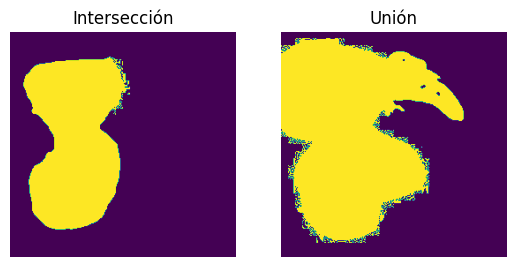

In [ ]:
# Obtener la intersección de las dos imágenes
interseccion = np.logical_and(predicted_mask > th, mask_to_show)

# Unir las dos imágenes
union = np.logical_or(predicted_mask > th, mask_to_show)

# Mostrar la intersección y la unión de las dos imágenes
plt.subplot(1, 2, 1)
plt.imshow(interseccion)
plt.axis('off')
plt.title('Intersección')
plt.subplot(1, 2, 2)
plt.imshow(union)
plt.axis('off')
plt.title('Unión')
plt.show()

Iou 0.5568707842877926


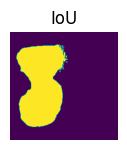

In [ ]:
intersection = np.sum((predicted_mask > th) & (mask_to_show.numpy() > 0))
union = np.sum((predicted_mask > th) | (mask_to_show.numpy() > 0))
iou = intersection / union
print("Iou",iou)
# Mostrar la imagen IoU
plt.subplot(1, 4, 4)
plt.imshow((predicted_mask > th) & (mask_to_show.numpy() > 0))
plt.axis('off')
plt.title('IoU')
plt.show()


In [ ]:
import pandas as pd

<Axes: ylabel='Frequency'>

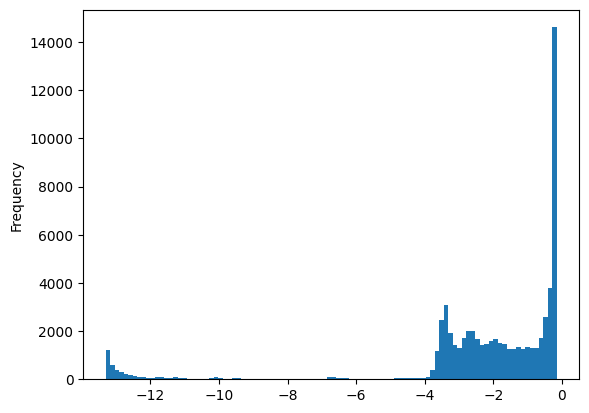

In [ ]:
pd.Series(predicted_mask.ravel()).plot.hist(bins=100)

#U-ResNet